# TASK-3 :The Spark Foundation


# Prediction using Decision Tree Algorithm

Decision Tree Algorithm:
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature .
The final goal of a decision tree is that it has to make the optimal choice at the end of each node. 
I will be implementing a simple decision tree model to classify iris plants into three species using the lengths and widths of their petals and sepals, a classic data set in the machine learning 

In [2]:
#importing packages

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [39]:
#loading the dataset

In [40]:
dataset = pd.read_csv('Iris.csv')

In [41]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [43]:
dataset.shape

(150, 6)

In [44]:
#missing values

In [45]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Label Enconder


Label Encoder encodes the labels with a value between 0 and n_classes-1 where n is no. of distinct labels.

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
dataset['Species'] = pd.DataFrame(le.fit_transform(dataset['Species']))
dataset



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [52]:
#creating depedent and independent variables

In [53]:
X= dataset.iloc[:,0:4].values
y = dataset.iloc[:,-1].values

In [54]:
#training and Test data

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state = 0 , test_size = 0.33)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree


In [58]:
dt =  DecisionTreeClassifier()

In [59]:
model = dt.fit(X_train,y_train)

In [60]:
model_Score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(model_Score)

0.98


In [61]:
# Confusion matrix and classification 


In [62]:
from sklearn.metrics import classification_report

In [63]:
cm = confusion_matrix(y_pred,y_test)
cm


array([[16,  0,  0],
       [ 0, 19,  1],
       [ 0,  0, 14]], dtype=int64)

In [64]:
Cr = classification_report(y_pred,y_test)
print(Cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        20
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



From above classification report I say that my score which is equal to and acuracy score is 0.98 which is the good score

In [68]:
from sklearn.tree import  plot_tree

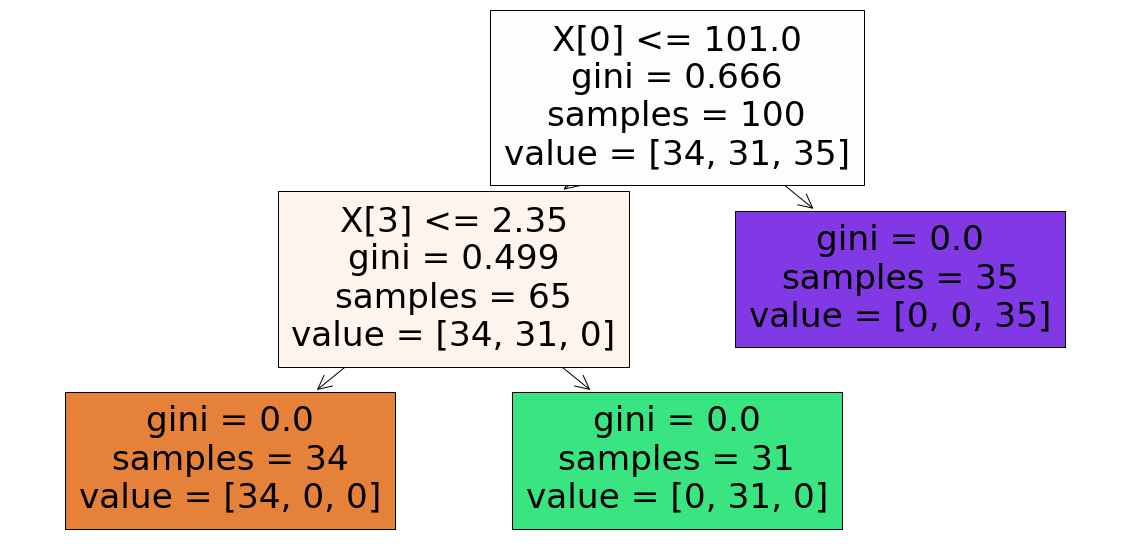

In [72]:
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model, filled=True)
# Display the tree plot figure.
plt.show()

The degree of Gini index varies between 0 and 1,  where 0 expresses the purity of classification, i.e. All the elements belong to a specified class or only one class exists there. And 1 indicates the random distribution of elements across various classes.
The value of 0.5 of the Gini Index shows an equal distribution of elements over some classe
From the above diagram I can say that my gini index is 0 ie., It expresses the purity of classification and it is correctly classified.